# ELEN 6885 Reinforcement Learning coding assignment

Your code should remain in the block marked by<br />
\############################<br />
\# YOUR CODE STARTS HERE<br />
\# YOUR CODE ENDS HERE<br />
\############################<br />
Please don't edit anything outside the block.

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import random
import matplotlib.pyplot as plt
import gym

## 1. Incremental Implementation of Average
We've finished the incremental implementation of average for you. Please call the function estimate with 1/step step size and fixed step size to compare the difference between this two on a simulated Bandit problem.<br />
<span style="color:red">(2 pts)</span>

In [2]:
from RLalgs.utils import estimate
random.seed(6885)
numTimeStep = 10000
q_h = np.zeros(numTimeStep + 1) # Q Value estimate with 1/step step size
q_f = np.zeros(numTimeStep + 1) # Q value estimate with fixed step size
FixedStepSize = 0.5 #A large number to exaggerate the difference
for step in range(1, numTimeStep + 1):
    if step < numTimeStep / 2:
        r = random.gauss(mu = 1, sigma = 0.1)
    else:
        r = random.gauss(mu = 3, sigma = 0.1)
    
    #TIPS: Call function estimate defined in ./RLalgs/utils.py
    ############################
    # YOUR CODE STARTS HERE
    q_h[step] = estimate(q_h[step-1],1/step,r)
    q_f[step] = estimate(q_f[step-1],FixedStepSize,r)
    # YOUR CODE ENDS HERE
    ############################
    
q_h = q_h[1:]
q_f = q_f[1:]

RLalgs is a package containing Reinforcement Learning algorithms Epsilon-Greedy, Policy Iteration, Value Iteration, Q-Learning, and SARSA.


Plot the two Q value estimates. (Please include a title, labels on both axes, and legends)<br />
<span style="color:red">(3 pts)</span>

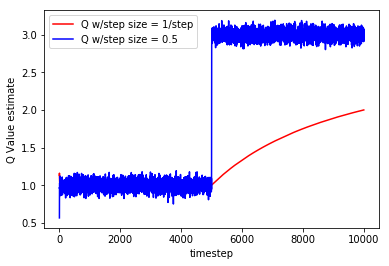

In [3]:
############################
# YOUR CODE STARTS HERE
numTimeStep = 10000
x = np.arange(numTimeStep)
plt.plot(x,q_h,c='r',label='Q w/step size = 1/step')
plt.plot(x,q_f,c='b',label='Q w/step size = 0.5')
plt.xlabel('timestep')
plt.ylabel('Q Value estimate')
plt.legend()
plt.show()
# YOUR CODE ENDS HERE
############################

## 2. $\epsilon$-Greedy for Exploration
In Reinforcement Learning, we are always faced with the dilemma of exploration and exploitation. $\epsilon$-Greedy is a trade-off between them. You are gonna implement Greedy and $\epsilon$-Greedy. We combine these two policies in one function by treating Greedy as $\epsilon$-Greedy where $\epsilon = 0$. Edit the function epsilon_greedy in ./RLalgs/utils.py.<br />
<span style="color:red">(5 pts)</span>

In [4]:
from RLalgs.utils import epsilon_greedy
np.random.seed(6885) #Set the seed to cancel the randomness
q = np.random.normal(0, 1, size = 5)
############################
# YOUR CODE STARTS HERE
greedy_action = epsilon_greedy(q,0,seed = 6885) #Use epsilon = 0 for Greedy
e_greedy_action = epsilon_greedy(q,0.1,seed = 6885) #Use epsilon = 0.1 and pass the parameter seed = 6885 to the function
# YOUR CODE ENDS HERE
############################
print('Values:')
print(q)
print('Greedy Choice =', greedy_action)
print('Epsilon-Greedy Choice =', e_greedy_action)

Values:
[ 0.61264537  0.27923079 -0.84600857  0.05469574 -1.09990968]
Greedy Choice = 0
Epsilon-Greedy Choice = 0


You should get the following results.<br />
Values:<br />
\[ 0.61264537  0.27923079 -0.84600857  0.05469574 -1.09990968\]<br />
Greedy Choice = 0<br />

## 3. Frozen Lake Environment 

In [5]:
env = gym.make('FrozenLake-v0')

### 3.1 Derive Q value from V value
Edit function action_evaluation in ./RLalgs/utils.py.<br />
TIPS: $q(s, a)=\sum_{s',r}p(s',r|s,a)(r+\gamma v(s'))$<br />
<span style="color:red">(5 pts)</span>

In [6]:
from RLalgs.utils import action_evaluation
v = np.ones(16)
q = action_evaluation(env = env.env, gamma = 1, v = v)
print('Action values:')
print(q)

Action values:
[[1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.33333333 1.33333333 1.33333333]
 [1.         1.         1.         1.        ]]


You should get Q values all equal to one except at State 14

Pseudo-codes of the following four algorithms can be found on Page 80, 83, 130, 131 of the Sutton's book.

### 3.2 Model-based RL algorithms

In [7]:
from RLalgs.utils import action_evaluation, action_selection, render

### 3.2.1 Policy Iteration
Edit the function policy_iteration and relevant functions in ./RLalgs/pi.py to implement the Policy Iteration Algorithm.<br />
<span style="color:red">(15 pts)</span>

In [8]:
from RLalgs.pi import policy_iteration
V, policy, numIterations = policy_iteration(env = env.env, gamma = 1, max_iteration = 500, theta = 1e-7)
print('State values:')
print(V)
print('Number of iterations to converge =', numIterations)

State values:
[0.82352709 0.82352631 0.82352576 0.82352547 0.82352726 0.
 0.5294101  0.         0.82352758 0.82352804 0.76470468 0.
 0.         0.88235197 0.94117597 0.        ]
Number of iterations to converge = 7


You should get values close to:<br />
State values:<br />
\[0.82352774 0.8235272  0.82352682 0.82352662 0.82352791 0.<br />
0.52941063 0.         0.82352817 0.82352851 0.76470509 0.<br />0.         0.88235232 0.94117615 0.\]

In [9]:
#Uncomment and run the following to evaluate your result, comment them when you generate the pdf
# Q = action_evaluation(env = env.env, gamma = 1, v = V)
# policy_estimate = action_selection(Q)
# render(env, policy_estimate)

### 3.2.2 Value Iteration
Edit the function value_iteration and relevant functions in ./RLalgs/vi.py to implement the Value Iteration Algorithm.<br />
<span style="color:red">(10 pts)</span>

In [10]:
from RLalgs.vi import value_iteration
V, policy, numIterations = value_iteration(env = env.env, gamma = 1, max_iteration = 500, theta = 1e-7)
print('State values:')
print(V)
print('Number of iterations to converge =', numIterations)

State values:
[0.82352709 0.82352631 0.82352576 0.82352548 0.82352726 0.
 0.52941011 0.         0.82352759 0.82352804 0.76470468 0.
 0.         0.88235197 0.94117597 0.        ]
Number of iterations to converge = 0


You should get values close to:<br />
State values:<br />
\[0.82352773 0.82352718  0.8235268 0.8235266 0.8235279 0.<br />
0.52941062 0.         0.82352816 0.8235285 0.76470509 0.<br />0.         0.88235231 0.94117615 0.\]

In [11]:
#Uncomment and run the following to evaluate your result, comment them when you generate the pdf
# Q = action_evaluation(env = env.env, gamma = 1, v = V)
# policy_estimate = action_selection(Q)
# render(env, policy_estimate)

### 3.3 Model free RL algorithms

### 3.3.1 Q-Learning
Edit the function QLearning in ./RLalgs/ql.py to implement the Q-Learning Algorithm.<br />
<span style="color:red">(10 pts)</span>

In [12]:
from RLalgs.ql import QLearning
Q = QLearning(env = env.env, num_episodes = 1000, gamma = 1, lr = 0.1, e = 0.1)
print('Action values:')
print(Q)

Action values:
[[0.56847841 0.45143216 0.48040944 0.40579652]
 [0.00346183 0.25712485 0.         0.0911148 ]
 [0.26968876 0.06140907 0.05103773 0.05486191]
 [0.00766047 0.00288007 0.         0.04905045]
 [0.57303626 0.3349405  0.31415295 0.41007037]
 [0.         0.         0.         0.        ]
 [0.25770558 0.         0.         0.00301399]
 [0.         0.         0.         0.        ]
 [0.31850157 0.20854625 0.33403122 0.58518182]
 [0.25121089 0.5888725  0.27468913 0.24519182]
 [0.47168168 0.25538497 0.21979723 0.09368808]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.12959867 0.35053343 0.69721912 0.34409052]
 [0.37136362 0.50521028 0.83852264 0.31444075]
 [0.         0.         0.         0.        ]]


Generally, you should get non-zero action values on non-terminal states.

In [13]:
#Uncomment the following to evaluate your result, comment them when you generate the pdf
env = gym.make('FrozenLake-v0')
policy_estimate = action_selection(Q)
print(policy_estimate)
#render(env, policy_estimate)

[0 1 0 3 0 0 0 0 3 1 0 0 0 2 2 0]


### 3.3.2 SARSA
Edit the function SARSA in ./RLalgs/sarsa.py to implement the SARSA Algorithm.<br />
<span style="color:red">(10 pts)</span>

In [14]:
from RLalgs.sarsa import SARSA
Q = SARSA(env = env.env, num_episodes = 1000, gamma = 1, lr = 0.1, e = 0.1)
print('Action values:')
print(Q)

Action values:
[[5.61454321e-02 6.42643342e-02 6.31032800e-02 7.25160919e-02]
 [5.67195651e-02 4.86841163e-02 4.28892706e-02 8.23094105e-02]
 [8.64071947e-02 7.41131471e-02 8.02013865e-02 6.85302851e-02]
 [6.30912344e-02 1.81075192e-02 5.62901307e-03 3.33441707e-04]
 [9.78102355e-03 7.18825329e-03 1.16403347e-02 2.92668759e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.88530124e-02 5.76600957e-02 9.88703873e-02 2.26295307e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.08444848e-02 0.00000000e+00 0.00000000e+00]
 [4.49525267e-02 3.13620867e-02 7.73854088e-02 0.00000000e+00]
 [1.73944757e-01 2.29883645e-01 1.13868776e-01 2.28694676e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.38127884e-02 3.00619518e-01 1.01560465e-01 8.00620121e-02]
 [2.51702637e-01 7.27214121e-01 2.16262739e-01 2.12003654e-01]
 [0.00000000e+00 0.00000000e+00 0.000000

Generally, you should get non-zero action values on non-terminal states.

In [ ]:
#Uncomment the following to evaluate your result, comment them when you generate the pdf
#env = gym.make('FrozenLake-v0')
#policy_estimate = action_selection(Q)
#render(env, policy_estimate)

### 3.4 Human
You can play this game if you are interested. See if you can get the frisbee either with or without the model.

In [16]:
from RLalgs.utils import human_play
#Uncomment and run the following to play the game, comment it when you generate the pdf
# env = gym.make('FrozenLake-v0')
# human_play(env)